# Finding the Best Markets to Advertise In
Online programming courses are very popular nowadays. In this project, I will act as though I am working for an online computer programming education company, and I will determine **which global markets are best for my company to advertise in.**

**Company Background:** Most of my company's online courses teach **web and mobile development,** but we also offer courses in **data science, game development, and others.** We need to know which **2 markets** to begin advertising in immediately.

To answer this question, I will use data from a popular online programming education website, [FreeCodeCamp](https://www.freecodecamp.org/). I will use the data they have compiled from 2017, which I have collected from [their Github repository here](https://github.com/freeCodeCamp/2017-new-coder-survey). Since they have already cleaned the data, I will go ahead and use their clean dataset.

## Question:

*Which **2 global markets** should my online programming education company begin advertising in immediately?*

## Table of Contents:
* [Introducing the Data](#introducing)
* [Evaluating Representativity](#representativity)
    * [Summary of Representativity Evaluation](#summary)
* [Preliminary Analysis](#preliminary)
* [Customer Spending Analysis](#spending)
* [Detailed Analysis of 5 Chosen Countries](#detailed)
    * [Removing Outliers](#outliers)
    * [Final Summary Statistics & Visualization](#visualization)
* [Conclusion](#conclusion)

## Introducing the Data <a class="anchor" id="introducing"></a>

In [1]:
#Importing python libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy.stats import t

In [2]:
#Reading the data
fcc = pd.read_csv('/Users/admin/Datasets/2017-fCC-New-Coders-Survey-Data.csv', low_memory=0)

#Viewing the data shape
fcc.shape

(18175, 136)

In [3]:
#Setting the data viewing preferences for this notebook
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

#Viewing the first 5 rows of the data
fcc.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [4]:
#Viewing the columns of the data
columns = []
for a in fcc.columns:
    columns.append(a)

columns

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampName',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'FirstDevJob',
 'Gender',
 'GenderOther',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits'

## Evaluating Representativity <a class="anchor" id="representativity"></a>
**Population:** The **population** relevant to this analysis is *the set of all new programmers that show interest primarily in online web and mobile development courses, but also other programming courses.* 

**Sample:** The **sample** of this population is *the set of all new FreeCodeCamp students in 2017.*

**Representativity:** *Is my sample representative of this population?*

To answer this question, I will determine **how many of the students** in this 2017 FreeCodeCamp dataset are interested in **Web or Mobile Development.**

Let's start by viewing the value counts of the `JobRoleInterest` column in the dataset.

In [5]:
#Viewing the values in the `JobRoleInterest` column
fcc['JobRoleInterest'].value_counts(normalize=True).head(50)*100

Full-Stack Web Developer                                                           11.770595
  Front-End Web Developer                                                           6.435927
  Data Scientist                                                                    2.173913
Back-End Web Developer                                                              2.030892
  Mobile Developer                                                                  1.673341
Game Developer                                                                      1.630435
Information Security                                                                1.315789
Full-Stack Web Developer,   Front-End Web Developer                                 0.915332
  Front-End Web Developer, Full-Stack Web Developer                                 0.800915
  Product Manager                                                                   0.786613
Data Engineer                                                         

The first noticable trend in the data is that many students have chosen more than 1 area of interest. 

However, we can see quickly that our list here is full of programmers interested in 
* **web development** 
* **data science**
* **mobile development**
* **game development**
* **and other programming fields.**

Many students show interest in *more than one field of study.* Some students do not show interest in our primary fields of study, but *most show interest in at least 1.*

Since we are focusing primarily on our **web and mobile development courses,** 

**Question:** *How many students from this list show interest in online web and mobile development courses?*

I will answer this question quickly with a *bird's eye view* chart and a simple *percentage*, followed by a more detailed *granular percentage* and *granular visual chart.*

Let's start with visualizing the top 5 submissions for the `JobRoleInterest` column.

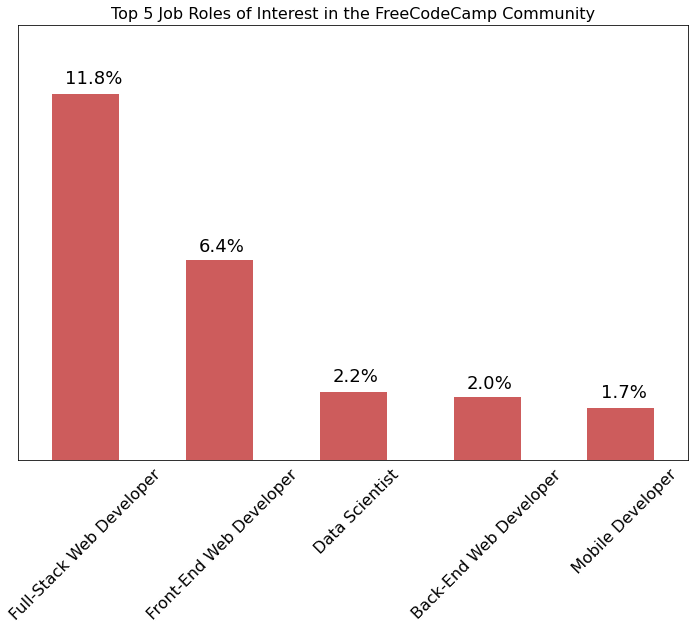

In [6]:
#Visualizing the top 5 submissions for the `JobRoleInterest` column

ind_red = '#cd5c5c'

top_five_job_roles = fcc['JobRoleInterest'].value_counts(normalize=True).head(5)*100

#Plotting the top 5 job roles data
top_five_job_roles.plot.bar(color = ind_red, figsize=(12,8), fontsize=16, rot=45)

#Setting chart parameters
plt.title('Top 5 Job Roles of Interest in the FreeCodeCamp Community', fontsize=16)
plt.tick_params(left=False, bottom=False)
plt.ylim([0,14])
plt.yticks([])

#Inputing percentage data on top of the bars in the chart
plt.text(-0.15,12.1,str(round(top_five_job_roles[0],1)) + '%', fontsize=18)
plt.text(0.85,6.7,str(round(top_five_job_roles[1],1)) + '%', fontsize=18)
plt.text(1.85,2.5,str(round(top_five_job_roles[2],1)) + '%', fontsize=18)
plt.text(2.85,2.3,str(round(top_five_job_roles[3],1)) + '%', fontsize=18)
plt.text(3.85,2.0,str(round(top_five_job_roles[4],1)) + '%', fontsize=18)

#Showing the chart
plt.show()

We can see from the first visualization that **Web and Mobile Development** are very popular *stand-alone submissions.*

Let's go ahead and see what percentage of students chose **only 1 type of Web or Mobile Development** and which percentage of students chose **at least 1 type of Web or Mobile Development.**

In [7]:
#Viewing the percentage of students interested in only 1 specific type of web or mobile development

#Aggregating the 1-type web or mobile development percents
fs_web = round(top_five_job_roles[0],1)
fe_web = round(top_five_job_roles[1],1)
be_web = round(top_five_job_roles[3],1)
m_dev = round(top_five_job_roles[4],1)
top_5_pct_web_mobile = fs_web+fe_web+be_web+m_dev

#Printing the percentage
print('Percentage of students interested in 1 specific type of Web or Mobile Development:')
print(round(top_5_pct_web_mobile,1), '%')

Percentage of students interested in 1 specific type of Web or Mobile Development:
21.9 %


In [8]:
#Viewing the percentage of students interested in web or mobile development

#Creating boolean series of students interested in web or mobile development
web_mobile_chart = fcc['JobRoleInterest'].dropna().str.contains('Web Developer|Mobile Developer').value_counts()

#Creating 2 series, one of students with interest, one without
nr_web_mobile = web_mobile_chart[True]
nr_not_web_mobile = web_mobile_chart[False]

#Calculating the percentage of students interested in web or mobile development
pct_web_mob = round(nr_web_mobile/(nr_web_mobile+nr_not_web_mobile)*100,2)

#Printing the percentage
print('Percentage of students interested in at least 1 type of Web or Mobile Development:')
print(pct_web_mob, '%')

Percentage of students interested in at least 1 type of Web or Mobile Development:
86.24 %


$86.24\%$ of students in the dataset are interested in **Web or Mobile Development** to some extent.

Let's go ahead and visualize this percentage in a bar chart:

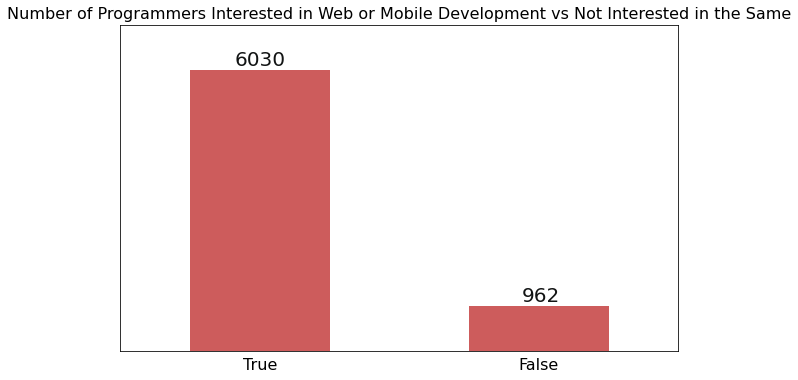

In [9]:
#Visualizing percentage of students interested in Web or Mobile Development as a bar chart

dark_dark_gray = '#121414'

#Plotting the percents
web_mobile_chart.plot.bar(color = ind_red, figsize=(10,6), fontsize=16, rot=0)

#Setting the chart parameters
plt.title('Number of Programmers Interested in Web or Mobile Development vs Not Interested in the Same', fontsize=16)
plt.tick_params(left=False, bottom=False)
plt.ylim([0,7000])
plt.yticks([])

#Inputing percentage data on top of the bars in the chart
plt.text(-0.09,6130,nr_web_mobile,fontsize=20, color=dark_dark_gray)
plt.text(0.94,1062, nr_not_web_mobile, fontsize=20, color=dark_dark_gray)

plt.show()

### Summary of Representativity Evaluation <a class="anchor" id="summary"></a>

**4 of the top 5 most common job roles** of interest chosen by new programmers on FreeCodeCamp are a specific type of **Web or Mobile Developer.** 

$86.2\%$ of students chose **Web or Mobile Developer** as **one their listed job role interests**.

Since our company offers courses primarily in **Web or Mobile Development,** but also **other programming disciplines,** this appears to be a **representative sample** of the *population of interest* for our purposes.

## Preliminary Analysis <a class="anchor" id="preliminary"></a>

Now we can begin evaluating which **global markets** will be best to advertise in.

To start, let's see which countries have the **highest frequency of users** in this dataset:

In [10]:
#Viewing frequency table of `CountryLive` column

#Selecting only rows in which `JobRoleInterest` is not null
fcc_jobrole = fcc[fcc['JobRoleInterest'].notnull()]

#Finding absolute and relative frequencies for `CountryLive` column
country_live_absolute = fcc_jobrole['CountryLive'].value_counts()
country_live_relative = fcc_jobrole['CountryLive'].value_counts(normalize=True)*100

#Viewing frequency table
pd.DataFrame({'Absolute frequency': country_live_absolute, 'Percentage': country_live_relative}).head(20)

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


With an initial analysis, it appears that the **2 best markets** that we should advertise in are:

* **United States of America**
* **India.** 

However, this is not the end of our analysis. We still need to know which markets have students most **capable of paying** for our services!

Our company sells subscriptions at **$\$59$ per month.** We want to know **which markets are likely to afford this subscription.**

We can use two more columns to determine this:

* `MoneyForLearning`: shows us how much money each new programmer has spent on their programming education up until the moment of survey.
* `MonthsProgramming`: shows us how many months the new programmer has been programming.

By **dividing these columns,** we can determine which markets can likely **afford our courses.**

## Customer Spending Analysis <a class="anchor" id="spending"></a>

To calculate a `Monthly` column that shows how much each student has paid per month for their programming education, we need to divide the `MoneyForLearning` column by the `MonthsProgramming` column.

Let's get a quick idea of the `MoneyForLearning` and `MonthsProgramming` columns:

In [11]:
#Viewing the top 5 values in the `MoneyForLearning` column
fcc_jobrole['MoneyForLearning'].value_counts().head()

0.0      3194
100.0     434
200.0     315
500.0     232
50.0      227
Name: MoneyForLearning, dtype: int64

In [12]:
#Viewing the lowest values in the `MonthsProgramming` column
fcc_jobrole['MonthsProgramming'].value_counts().sort_index().head()

0.0    235
1.0    767
2.0    669
3.0    637
4.0    367
Name: MonthsProgramming, dtype: int64

Some rows have a $0$ in the `MonthsProgramming` column. We will need to change these values so that we do not divide by zero. I will change these values to $1$.

In [13]:
#Replacing 0 values with 1 values
fcc_jobrole['MonthsProgramming'].replace(0,1, inplace = True)

#Viewing the top 5 values in the `MonthsProgramming` values
fcc_jobrole['MonthsProgramming'].value_counts(dropna=False).sort_index().head()

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


1.0    1002
2.0     669
3.0     637
4.0     367
5.0     279
Name: MonthsProgramming, dtype: int64

Now let's create the `Monthly` column:

In [14]:
#Creating the `Monthly` column
fcc_jobrole['Monthly'] = fcc_jobrole['MoneyForLearning']/fcc_jobrole['MonthsProgramming'].copy()

#Viewing the notnull distribution in the `Monthly` column
fcc_jobrole['Monthly'].isnull().value_counts()

<ipython-input-14-299049829822>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fcc_jobrole['Monthly'] = fcc_jobrole['MoneyForLearning']/fcc_jobrole['MonthsProgramming'].copy()


False    6317
True      675
Name: Monthly, dtype: int64

Let's get a bit of a *statistical* and *visual* representation of our new `Monthly` column:

In [15]:
#Selecting rows that contain non-null values in the `Monthly` column
fcc_clean = fcc_jobrole[fcc_jobrole['Monthly'].notnull()]

#Viewing the top 15 `Monthly` values
fcc_clean['Monthly'].value_counts().head(15)

0.000000      3092
50.000000      128
25.000000      120
16.666667      118
100.000000     118
33.333333      109
8.333333       105
20.000000       88
10.000000       83
83.333333       80
166.666667      67
12.500000       66
4.166667        65
5.000000        62
200.000000      53
Name: Monthly, dtype: int64

<AxesSubplot:>

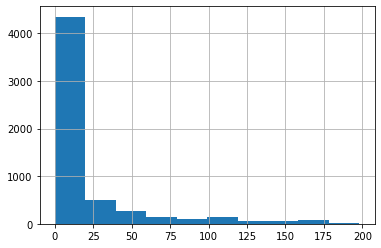

In [16]:
#Viewing the histogram distribution of those who spent less than $200 per month
fcc_clean[fcc_clean['Monthly'] < 200]['Monthly'].hist()

Now let's see the new `CountryLive` distribution:

In [17]:
#Finding the value counts
country_live_abs_clean = fcc_clean['CountryLive'].value_counts()
country_live_rel_clean = fcc_clean['CountryLive'].value_counts(normalize=True)*100

#Viewing the new `CountryLive` value distribution
pd.DataFrame({'Absolute frequency': country_live_abs_clean, 'Percentage': country_live_rel_clean}).head(20)

,Absolute frequency,Percentage
United States of America,2933,47.215068
India,463,7.453316
United Kingdom,279,4.491307
Canada,240,3.863490
Poland,122,1.963941
Germany,114,1.835158
Brazil,111,1.786864
Australia,102,1.641983
Russia,79,1.271732
Ukraine,79,1.271732


After selecting for only users that reported their money spent for learning, we see approximately the same distribution as before:

* **United States**
* **India**

In the top 10 countries shown, 5 of them are **English-speaking countries**. This is good since *our courses are in English*. Since there are so many students in these English-speaking countries in this dataset, I will now *focus the rest of this research on these countries*.

**These are the countries I will focus on:**

* United States
* India
* United Kingdom
* Canada
* Australia 

In [18]:
#Selecting 5 English-speaking countries
five_countries = fcc_clean[fcc_clean['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada|Australia', na=False)]

five_absolute = five_countries['CountryLive'].value_counts()
five_relative = five_countries['CountryLive'].value_counts(normalize=True)*100

pd.DataFrame({'Students': five_absolute, 'Percentage': five_relative})

,Students,Percentage
United States of America,2933,73.014688
India,463,11.526014
United Kingdom,279,6.945482
Canada,240,5.974608
Australia,102,2.539208


**United States** and **India** have many more customers in their market than the other 3 countries, United Kingdom, Canada, and Australia.

With the data whittled down to just 5 countries, we can look more closely at some specifics, including finding outliers and reviewing more aggregate data. Let's go ahead and do that.

## Detailed Analysis of 5 Chosen Countries <a class="anchor" id="detailed"></a>

Let's first view the average monthly amount spent per country on the new list:

In [19]:
countries = ['United States of America', 'India', 'United Kingdom', 'Canada', 'Australia']

#Grouping by `CountryLive` column and calculating averages
country_live_mean = five_countries.groupby(['CountryLive']).mean()

#Calculating average monthly spending
averages = country_live_mean['Monthly'][countries].sort_values(ascending=False)

#Viewing average monthly spending
pd.DataFrame({'Average': averages})

,Average
CountryLive,
Australia,419.268452
United States of America,227.997996
India,135.100982
Canada,113.510961
United Kingdom,45.534443


On average, so far we expect to earn the **most money per student** from these countries:

* **Australia**
* **United States**

However, this may be misleading. There are far fewer students in Australia than the other 4 countries. Let's **weigh each average** by the **percent of students in each country** to see which countries reveal the highest weighted average spending: 

In [20]:
#Calculating the weighted averages
weighted = {}
for country in countries:
    avg = averages.loc[country]
    weight = five_relative.loc[country]/100
    weighted_avg = avg*weight
    weighted[country] = weighted_avg
    
#Sorting the weighted averages
sorted_weighted = dict(sorted(weighted.items(), key= lambda item: item[1], reverse=True))

#Viewing the weighted averages
pd.DataFrame({'Weighted Avg': sorted_weighted}, index=sorted_weighted.keys())

,Weighted Avg
United States of America,166.472024
India,15.571759
Australia,10.646100
Canada,6.781835
United Kingdom,3.162586


With **weighted averages** considered, the top 2 countries we see are:

* **United States**
* **India**

However, this data may still have **outliers**. We have not taken care of them yet. Let's do that now. First, we will look at the data using the Python Seaborn library.

### Removing Outliers <a class="anchor" id="outliers"></a>

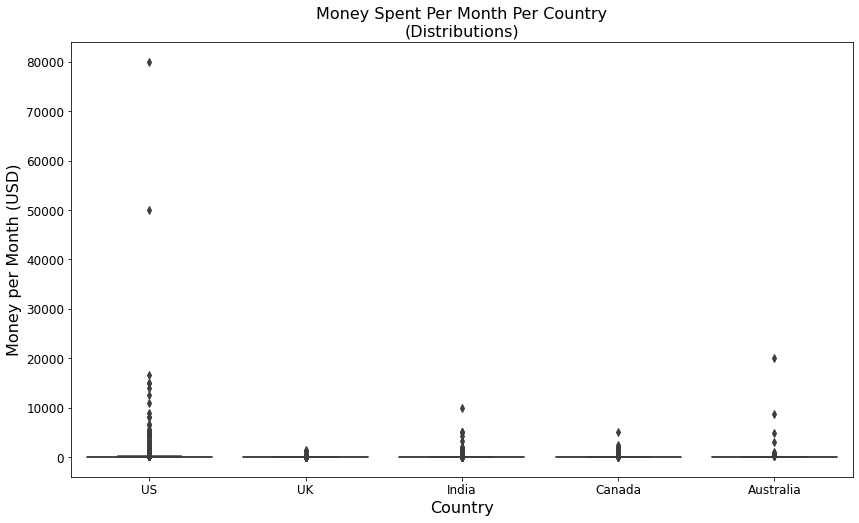

In [21]:
#Generating the plot
fig, ax = plt.subplots(figsize=(14, 8))

#Plotting the data
sns.boxplot(y = 'Monthly', x = 'CountryLive', data = five_countries)

#Setting the chart parameters
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)

plt.ylabel('Money per Month (USD)', fontsize=16)
plt.xlabel('Country', fontsize=16)

plt.xticks(range(5), ['US', 'UK', 'India', 'Canada','Australia'], fontsize=12) #Order that countries appear in data
plt.yticks(fontsize=12)

plt.show()

Most of the data seems reasonable. 

There are some outliers in the US and Australia, who reportedly spent more than $\$50,000$ dollars per month and $\$20,000$ per month respectively. These values are extremely unlikely. Therefore, I will remove all values greater than $\$20,000$, and then redo the analysis.

In [22]:
#Removing outliers
five_countries = five_countries[five_countries['Monthly'] < 20000]

#Recalculating the weights and averages
five_relative = five_countries['CountryLive'].value_counts(normalize=True)*100
averages = five_countries.groupby(['CountryLive']).mean()['Monthly'][countries].sort_values(ascending=False)

#Calculating the weighted averages
weighted = {}
for country in countries:
    avg = averages.loc[country]
    weight = five_relative.loc[country]/100
    weighted_avg = avg*weight
    weighted[country] = weighted_avg
    
#Sorting the weighted averages
sorted_weighted = dict(sorted(weighted.items(), key= lambda item: item[1], reverse=True))

#Viewing the weighted averages
pd.DataFrame({'Weighted Avg': sorted_weighted}, index=sorted_weighted.keys())

,Weighted Avg
United States of America,134.209796
India,15.583397
Canada,6.786903
Australia,5.671495
United Kingdom,3.164950


With the weighted averages, we are now seeing that the top 2 countries are:

* **United States**
* **India**

Let's review a new Seaborn boxplot and see if there are any more outliers to remove:

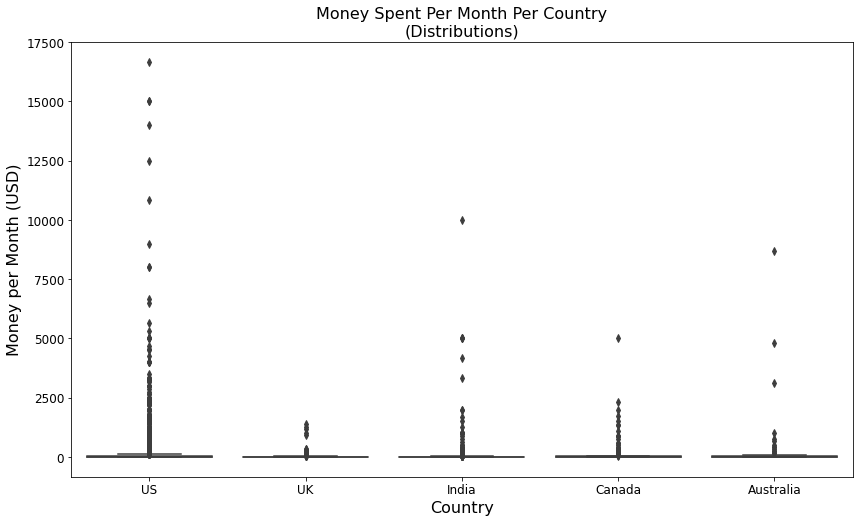

In [23]:
#Generating the plot
fig, ax = plt.subplots(figsize=(14, 8))

#Plotting the data
sns.boxplot(y = 'Monthly', x = 'CountryLive', data = five_countries)

#Setting the chart parameters
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)

plt.ylabel('Money per Month (USD)', fontsize=16)
plt.xlabel('Country', fontsize=16)

plt.xticks(range(5), ['US', 'UK', 'India', 'Canada','Australia'], fontsize=12) #Correct order of countries in data
plt.yticks(fontsize=12)

plt.show()

There still seem to be a few suspicious marks in the data. 

Many programmers have reportedly spent **more than $\$2,500$ per month** on learning, which is unusual. 

Perhaps these learners **participated in bootcamps,** which could cause their monthly cash spent to be high. 

I will now investigate to find out **which big spenders have participated in boot camps or not,** and only keep the ones that have.

In [24]:
#India outliers
india_outliers = five_countries[
    (five_countries['CountryLive'] == 'India') & (five_countries['Monthly'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Monthly
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.

All outliers in India reported **not having particiated in a bootcamp**. Therefore, I will drop these rows:

In [25]:
#Dropping India outliers
five_countries = five_countries.drop(india_outliers.index)

In [26]:
#Australia outliers
australia_outliers = five_countries[
    (five_countries['CountryLive'] == 'Australia') & (five_countries['Monthly'] >= 2500)]
australia_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Monthly
88,24.0,1.0,0.0,1.0,Codemaster Institute,1.0,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia,Australia,NaN,NaN,NaN,Currently completing a bootcamp -student,45000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,40.0,d1ac46e55c540418f9252b210c1d964b,75ddf4d578ace9482d46aacc3a7034de,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,work for a medium-sized company,0.0,"Game Developer, Full-Stack Web Developer",in an office with other developers,English,"single, never married",9600.0,2.0,00a5dd2bbd,2017-03-09 05:15:19,2017-03-09 05:11:31,2017-03-09 05:26:53,2017-03-09 05:15:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,"trade, technical, or vocational training",NaN,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4800.000000
3931,35.0,1.0,0.0,1.0,Coder Factory,1.0,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia,Australia,NaN,NaN,Not working and not looking for work,NaN,90000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,0.0,1.0,0.0,1.0,400000.0,60.0,a0efd73206cfaa46e15afc5752fdad8e,dde126e6be45bff8c3562df238630aac,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,1.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,work for a medium-sized company,1.0,"Back-End Web Developer, Full-Stack Web Develop...",in an office with other developers,English,married or domestic partnership,26000.0,3.0,90610463bc,2017-03-13 10:10:50,2017-03-13 10:03:57,2017-03-13 10:13:24,2017-03-13 10:11:00,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,

In [27]:
#Canada outliers
canada_outliers = five_countries[
    (five_countries['CountryLive'] == 'Canada') & (five_countries['Monthly'] >= 2500)]
canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Monthly
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


In [28]:
#US outliers
us_outliers = five_countries[
    (five_countries['CountryLive'] == 'United States of America') & (five_countries['Monthly'] >= 2500)]
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Monthly
484,25.0,1.0,1.0,0.0,Codesmith,1.0,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,105000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,50.0,5fec489ed2902cbf30fb42e4d29c7c3c,4f7a8fdb97f55a5516edbf424f8b2a81,NaN,0.0,0.0,0.0,NaN,I'm already applying,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a medium-sized company,1.0,"Full-Stack Web Developer, Front-End Web Deve...",in an office with other developers,English,"single, never married",20000.0,7.0,12b64e7c3a,2017-03-09 18:36:47,2017-03-09 18:33:06,2017-03-09 18:38:34,2017-03-09 18:36:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,bachelor's degree,Business Administration,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2857.142857
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Na

Some US outliers have participated in bootcamps, and some have not. Let's look more closely at those that did not.

In [29]:
#US outliers without bootcamp
us_outliers_no_bootcamp = five_countries[
    (five_countries['CountryLive'] == 'United States of America') & 
    (five_countries['Monthly'] >= 2500) &
    (five_countries['AttendedBootcamp'] != 1.0)]
us_outliers_no_bootcamp

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Monthly
2432,37.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,60000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,50.0,8ae37963c2406b846a883536cb0a524f,75172caaf4bd54a6814bcdca19add243,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a medium-sized company,1.0,"Front-End Web Developer, Data Scientist, F...",in an office with other developers,English,"single, never married",6500.0,2.0,44fd315d94,2017-03-10 22:25:38,2017-03-10 22:23:37,2017-03-10 22:26:59,2017-03-10 22:25:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,bachelor's degree,Economics,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3250.000000
2480,35.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 15 minutes,United States of America,United States of America,education,NaN,Employed for wages,NaN,75000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,55000.0,20.0,b59fc70a3c462df047dfc252caa22b22,394887f6372285d892bb87c88efcf925,50000.0,1.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,work for a medium-sized company,1.0,"Front-End Web Developer, Product Manager, ...",no preference,Korean,"single, never married",8500.0,2.0,1a85789bb8,2017-03-10 23:34:28,2017-03-10 23:20:27,2017-03-10 23:36:09,2017-03-10 23:34:31,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,N

Let's go ahead and **drop the US outliers with no bootcamp** rows:

In [30]:
#Dropping US no-bootcamp outliers
five_countries = five_countries.drop(us_outliers_no_bootcamp.index)

Let's review the *statistical data* and the *visualization* without the outliers.

### Final Summary Statistics & Visualization <a class="anchor" id="visualization"></a>

In [31]:
#Recalculating the weights and averages
five_relative = five_countries['CountryLive'].value_counts(normalize=True)*100
averages = five_countries.groupby(['CountryLive']).mean()['Monthly'][countries].sort_values(ascending=False)

#Calculating the weighted averages
weighted = {}
for country in countries:
    avg = averages.loc[country]
    weight = five_relative.loc[country]/100
    weighted_avg = avg*weight
    weighted[country] = weighted_avg
    
#Sorting the weighted averages
sorted_weighted = dict(sorted(weighted.items(), key= lambda item: item[1], reverse=True))

#Viewing the weighted averages
pd.DataFrame({'Weighted Avg': sorted_weighted}, index=sorted_weighted.keys())

,Weighted Avg
United States of America,104.830314
India,7.533656
Canada,6.829439
Australia,5.707040
United Kingdom,3.184786


Again, we are seeing the top 2 global markets as:

* **United States**
* **India**

At this point, however, **Canada** and **Australia** are very close behind India.

Let's review our new Seaborn boxplot:

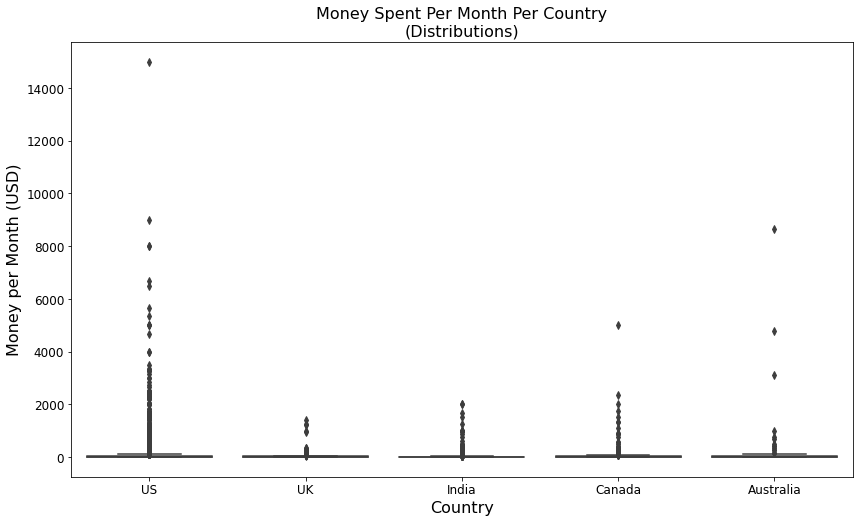

In [32]:
#Generating the plot
fig, ax = plt.subplots(figsize=(14, 8))

#Plotting the data
sns.boxplot(y = 'Monthly', x = 'CountryLive',
            data = five_countries)

#Setting the parameters
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)

plt.ylabel('Money per Month (USD)', fontsize=16)
plt.xlabel('Country', fontsize=16)

plt.xticks(range(5), ['US', 'UK', 'India', 'Canada','Australia'], fontsize=12) #Correct order of countries in data
plt.yticks(fontsize=12)

plt.show()

With the outliers removed, we can calculate more aggregate values to aid our analysis. 

Let's calculate the **median value** of the `Monthly` column for each country:

In [33]:
#Calculating the median values
medians = five_countries.groupby('CountryLive').median(numeric_only=True)['Monthly'].sort_values(ascending=False)

#Viewing the median values
pd.DataFrame({"Median": medians})

,Median
CountryLive,
Australia,3.333333
United States of America,3.125000
United Kingdom,0.000000
India,0.000000
Canada,0.000000


The **median value** of the `Monthly` column is only greater than $0$ in only $2$ countries:

* **United States**
* **Australia**

## Conclusion <a class="anchor" id="conclusion"></a>
After cleaning the data of outliers and visualizing it, it is clear that one country that we would like to advertise in is:

* **United States** 

Besides that, we are certain that we do not want to advertise in the United Kingdom. United Kingdom has appeared at the bottom of the list of median monthly spending, weighted average monthly spending, and does not show a very large number of students either.

This brings our second option to a choice between 3 countries:

* **Australia**
* **Canada**
* **India**

The **Australian** data shows that Australia has **3 big spenders propping up** their monthly spending average. However, even so, Australia has a higher median monthly spending value as well. The box plot above shows that if those 3 big spenders are ignored (maybe they entered their data wrong perhaps), then India or Canada would be the next best country for our marketing campaign. However, Australia does have the **highest median value**, giving it the edge over India and Canada in that respect. In fact, as opposed to Canada and India, at least half of the students in Australia have actually already paid for online programming education to some extent. Finally, Australia shows the least amount of programmers in our analysis compared to India and Canada.

**India** shows a great deal of interest in programming for web development and mobile development, and the learners that we see in this dataset clearly demonstrate a **higher weighted average of money spent** on their programming courses than students in Canada or Australia. The median value spent is zero, which is the same as Canada, which does not look promising. It means that at least half of its programmers on FreeCodeCamp have spent 0 dollars per month of learning programming. However, India does have the largest pool of programmers among itself, Canada, and Australia.

Not to be outdone, **Canada** shows a higher average of money spent per programmer than India. Canada shows fewer programmers in the FreeCodeCamp database than India, but more than Australia. Additionally, a great deal of Canada's average is propped up by one outlier who took a bootcamp course. Nevertheless, it is still a much higher average. It's median value for money spent per month is actually zero though, which means at least half of its programmers on FreeCodeCamp have spent 0 dollars per month on learning programming.

**Strengths of India**

* More students than Canada and Australia
* Higher weighted average money spent than Canada and Australia

**Strengths of Australia**

* Very high spenders
* Highest median monthly spent

**Strengths of Canada**

* Comparable weighted average to India
* More students than Australia

All in all, it is difficult to make a clear decision from the data alone. The best course of action now is to **send this information to the marketing department** and have experts with **domain knowledge** in the markets of these countries make the final decision.